10 1
{'indirect': (0.07319999999999999, 90.47619047619048), 'input-dep': (0.9088, 91.66666666666666), 'lfq': (0.5185000000000001, 92.98507462686567), 'loop-antidep': (1.7955, 90.0), 'thread': (0.5509, 91.73913043478261), 'thread_lock': (0.4912000000000001, 92.63157894736841)}
10 5
{'indirect': (0.06040000000000001, 90.0), 'input-dep': (0.7737, 90.0), 'lfq': (0.4791, 93.73134328358209), 'loop-antidep': (1.6203000000000003, 90.0), 'thread': (0.5319, 92.17391304347827), 'thread_lock': (0.4549, 92.63157894736841)}
10 10
{'indirect': (0.015700000000000002, 11.904761904761903), 'input-dep': (0.16260000000000002, 9.166666666666664), 'lfq': (0.0749, 54.17910447761193), 'loop-antidep': (0.7370000000000001, 4.285714285714285), 'thread': (0.1416, 40.8695652173913), 'thread_lock': (0.11810000000000001, 41.05263157894736)}
20 1
{'indirect': (0.07110000000000001, 91.9047619047619), 'input-dep': (0.8636000000000001, 91.66666666666666), 'lfq': (0.5183, 94.32835820895522), 'loop-antidep': (1.7044000000

<AxesSubplot:>

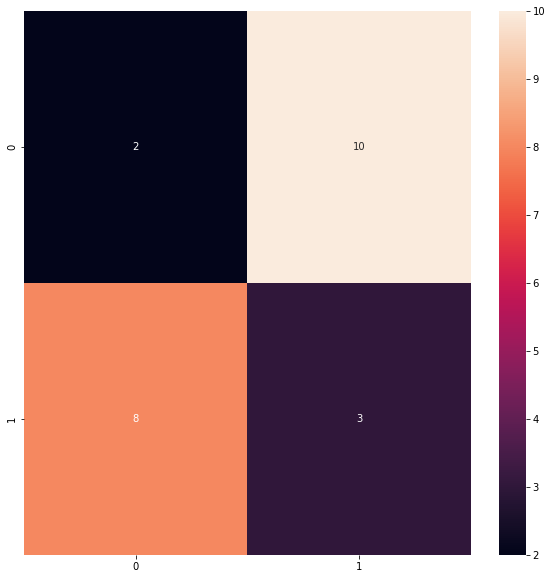

In [108]:
# Parse results

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools as it
import re
from pathlib import Path

def mean(l):
    return sum(l) / len(l)

def parse_batch_res(lines):
    header = re.compile(r'<-- Batch: (\S+) -->')
    max_time = re.compile(r'Max Time:\s*(.*)')
    accuracy = re.compile(r'Accuracy:\s*(.*)')
    
    run_results = [lines[i::3] for i in range(3)]

    compiler = [(header, str), (max_time, float), (accuracy, float)]
    full_results = [[compiler[i][1](compiler[i][0].match(elems).group(1)) \
                         for elems in run_key] for i, run_key in enumerate(run_results)]
    
    test_names = set(full_results[0])
    num_tests = len(test_names)
    
    comp_results = [full_results[0][:num_tests]] + [[mean(full_results[j][i::num_tests]) for i in range(num_tests)] for j in [1,2]]
    
    run_dict = { i[0]: i[1:] for i in zip(*comp_results) }
    return run_dict

    
    
results_dir = Path('results')

stoch_range = np.arange(10, 100, 10)
batch_range = np.array([1, 5, 10])

dataset_paths = results_dir.glob('run_*.res')
baseline_path = results_dir / 'single_run.res'


complete_run_dict = {}

for stoch, batch_size in it.product(stoch_range, batch_range):
    stoch_idx = np.where(stoch_range == stoch)[0][0]
    batch_idx = np.where(batch_range == batch_size)[0][0]
    print(stoch, batch_size)
    
    runs_content = []
    for dpath in results_dir.glob(f"run_*_{stoch}_{batch_size}.res"):
        with open(dpath) as f:
            runs_content += list(f.readlines())
    run_dict = parse_batch_res(runs_content)
    print(run_dict)
    
    for key, res in run_dict.items():
        if key not in complete_run_dict:
            complete_run_dict[key] = np.empty([stoch_range.size, batch_range.size, 2])
        complete_run_dict[key][stoch_idx][batch_idx][:] = np.array(res)

print(complete_run_dict)
        
#for dpath in dataset_paths:
#    fname = dpath.name[:-4]
#    (_, rno, stoch, batch_size) = fname.split('_')
#    np.where(stoch_range == stoch)[0]
#    stoch//10
#
#data = np.array([[2, 10], [8, 3]])
plt.figure(figsize=(10, 10))
sns.heatmap(data, annot=True)




In [137]:
print(complete_run_dict['indirect'].shape)
print(complete_run_dict['indirect'])

(9, 3, 2)
[[[7.32000000e-02 9.04761905e+01]
  [6.04000000e-02 9.00000000e+01]
  [1.57000000e-02 1.19047619e+01]]

 [[7.11000000e-02 9.19047619e+01]
  [7.13000000e-02 9.42857143e+01]
  [2.24000000e-02 5.14285714e+01]]

 [[7.64000000e-02 9.28571429e+01]
  [6.79000000e-02 9.57142857e+01]
  [3.55000000e-02 7.61904762e+01]]

 [[7.39000000e-02 9.42857143e+01]
  [6.96000000e-02 9.71428571e+01]
  [4.53000000e-02 8.95238095e+01]]

 [[7.20000000e-02 9.42857143e+01]
  [7.94000000e-02 9.90476190e+01]
  [5.07000000e-02 9.61904762e+01]]

 [[7.68000000e-02 9.42857143e+01]
  [7.11000000e-02 9.95238095e+01]
  [5.63000000e-02 9.90476190e+01]]

 [[8.19000000e-02 9.57142857e+01]
  [7.58000000e-02 9.95238095e+01]
  [6.62000000e-02 1.00000000e+02]]

 [[7.68000000e-02 9.66666667e+01]
  [7.63000000e-02 1.00000000e+02]
  [7.12000000e-02 1.00000000e+02]]

 [[7.93000000e-02 9.85714286e+01]
  [7.07000000e-02 1.00000000e+02]
  [7.12000000e-02 1.00000000e+02]]]


<AxesSubplot:>

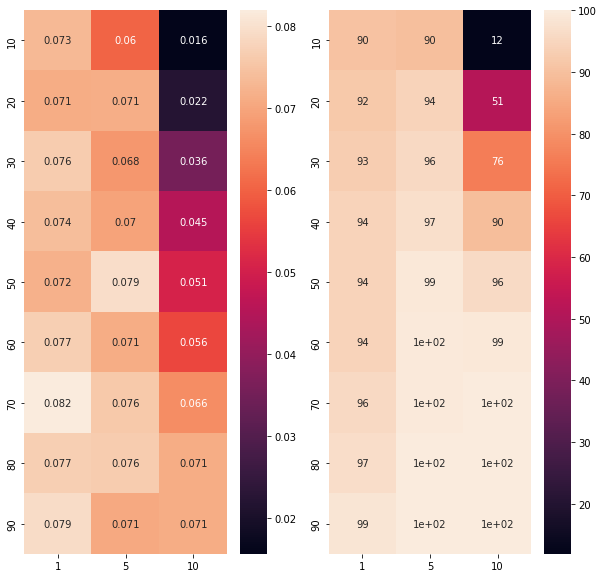

In [136]:
import matplotlib.pyplot as plt
data = np.array([[2, 10], [8, 3]])

fig, (ax, ax2) = plt.subplots(1, 2)
plt.rcParams['figure.figsize'] = [18, 10]

sns.heatmap(complete_run_dict['indirect'][:,:,0], annot=True,
           xticklabels=batch_range,
           yticklabels=stoch_range,
           ax=ax)

sns.heatmap(complete_run_dict['indirect'][:,:,1], annot=True,
           xticklabels=batch_range,
           yticklabels=stoch_range,
           ax=ax2)

